<a href="https://colab.research.google.com/github/timmpfe/Factor-Based-Analysis-of-Cryptocurrency-Returns/blob/main/GitHub_Version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
L_1 = [3,7,3,8,4,9,1,0]
L_2 = [1,2,3,4,4,5,1,2]

H_L = list()

for i in L_1:
  if i%2 == 0:
    H_L.append(i*sum(L_2))
  else:
    H_L.append(i)

In [ ]:
H_L

[3, 7, 3, 176, 88, 9, 1, 0]

In [ ]:
!pip install finance-byu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# DataSet Operations
import pandas as pd
import numpy as np

# DataSet Analysis
import scipy
from scipy import stats
from scipy.stats.mstats import winsorize

# Regression Analysis
import statsmodels.api as sm
import statsmodels.formula.api as smp
import statsmodels.regression.linear_model as rg
import statsmodels.tools.tools as ct
import statsmodels.stats.diagnostic as dg
import statsmodels.formula.api as smf
from statsmodels import regression
from statsmodels.regression.rolling import RollingOLS

# Plotting the Results
import matplotlib.pyplot as plt

# Fama MacBeth Table Plotting
from finance_byu.regtables import Regtable

# PCA Analysis
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Data Request
import requests

# Connection to Google Drive
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [ ]:
import bs4 as bs

# Initial Data Set

In [ ]:
initial_df = pd.read_csv('/drive/My Drive/Colab Notebooks/fin_short.csv')

In [ ]:
initial_df['date'] = pd.to_datetime(initial_df['date'])

In [ ]:
initial_df.set_index('date', inplace=True)

In [ ]:
initial_df['pct_change_24h']

6349607    1.150407e+20
6349609    1.122367e+20
6347975    1.063857e+20
6347973    1.054496e+20
6346336    1.017392e+20
               ...     
6072070    3.151429e+09
7425282    3.074551e+09
7441053    2.963401e+09
2677904    2.952500e+09
7430992    2.937091e+09
Name: pct_change_7d, Length: 100, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa163c72a10>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa163c774d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa163c72490>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa163c77f90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa163c7f510>],
 'means': []}

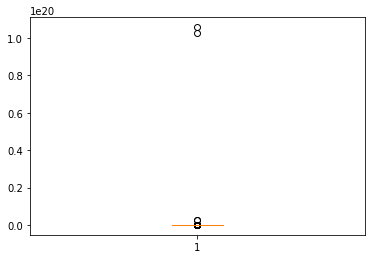

In [ ]:
plt.boxplot(initial_df['pct_change_24h'].dropna())

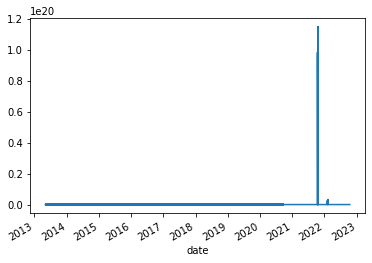

In [ ]:
initial_df['pct_change_7d'].plot()

In [ ]:
df = initial_df[(
    initial_df['pct_change_24h'] 
    <= 
    initial_df['pct_change_24h']
    .nlargest(1000)
    .min()
    ) & (
        initial_df['pct_change_24h']
         .notna()
         )]

In [ ]:
pct = initial_df[initial_df['pct_change_24h']< initial_df['pct_change_24h'].nlargest(500).min()]


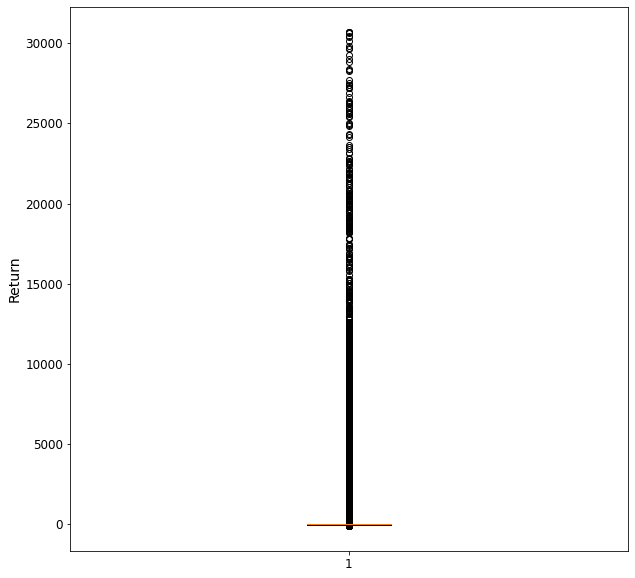

In [ ]:
plt.figure(figsize=(10,10))
plt.boxplot(pct['pct_change_24h'])
#plt.xlabel('Return',fontsize=14)
plt.ylabel('Return',
           fontsize=14)
plt.rc('axes', 
       labelsize=12)    # fontsize of the x and y labels
plt.rc('legend', 
       fontsize=12)    # legend fontsize
plt.rc('xtick', 
       labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', 
       labelsize=12)    # fontsize of the tick labels
#plt.savefig('/drive/My Drive/Colab Notebooks/Return_Distribution.png', dpi=300)

In [ ]:
from scipy.stats.mstats import winsorize

In [ ]:
initial_df.reset_index(inplace=True)

In [ ]:
b = initial_df[initial_df['pct_change_24h'].notna()]

In [ ]:
def win_series(group):
  group['pct_change_24h'] = winsorize(group['pct_change_24h'], limits=[0,0.01])
  return group

In [ ]:
df.reset_index(inplace=True)

In [ ]:
a = b.groupby('date').apply(win_series)

In [ ]:
a

,date,name_symbol,price,volume_24h,circulating_supply,market_cap,pct_change_24h,pct_change_7d,Date
7,2013-04-29,BITCOIN BTC,1.445400e+02,0.0,1.109568e+07,1.603769e+09,7.635530,NaN,2013-04-29
8,2013-04-29,LITECOIN LTC,4.383898e+00,0.0,1.719678e+07,7.538893e+07,0.920718,NaN,2013-04-29
10,2013-04-29,NAMECOIN NMC,1.328323e+00,0.0,5.424100e+06,7.204955e+06,18.558000,NaN,2013-04-29
11,2013-04-29,TERRACOIN TRC,7.096914e-01,0.0,2.334850e+06,1.657023e+06,9.584070,NaN,2013-04-29
12,2013-04-29,DEVCOIN DVC,3.743586e-04,0.0,4.371770e+09,1.636610e+06,14.639800,NaN,2013-04-29
...,...,...,...,...,...,...,...,...,...
8288541,2022-10-15,BABY-FPS-TOKEN BFPS,6.775802e-05,0.0,0.000000e+00,0.000000e+00,0.000000,-29.800288,2022-10-15
8288542,2022-10-15,ALEX-LAB ALEX,2.023764e-02,0.0,0.000000e+00,0.000000e+00,-1.788206,0.000000,2022-10-15
8288543,2022-10-15,RETAWARS-GOLDROSE-TOKEN GRT,1.494837e-02,0.0,0.000000e+00,0.000000e+00,0.000000,0.034392,2022-10-15
8288544,2022-10-15,AMETA APLUS,4.831760e-03,0.0,0.000000e+00,0.000000e+00,-8.270602,0.000000,2022-10-15


In [ ]:
c = a[a['pct_change_24h'] > 250]

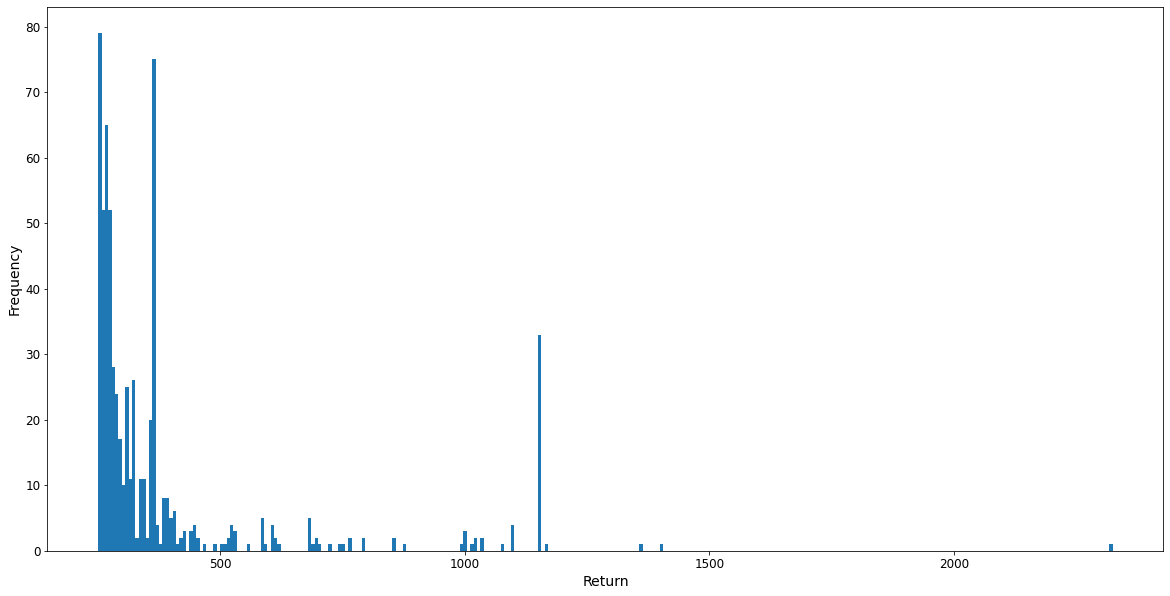

In [ ]:
plt.figure(figsize=(20,10))
plt.hist(c['pct_change_24h'], bins=300)
plt.xlabel('Return',
           fontsize=14)
plt.ylabel('Frequency',
           fontsize=14)
plt.rc('axes', 
       labelsize=12)    # fontsize of the x and y labels
plt.rc('legend', 
       fontsize=12)    # legend fontsize
plt.rc('xtick', 
       labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', 
       labelsize=12)    # fontsize of the tick labels
#plt.savefig('/drive/My Drive/Colab Notebooks/Return_Distribution.png', dpi=300)

In [ ]:
a.set_index('date', inplace=True)

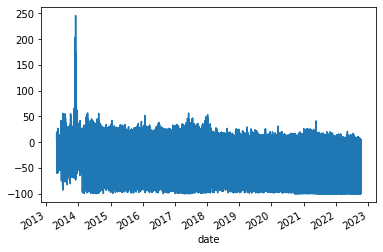

In [ ]:
a['pct_change_24h'].plot()

In [ ]:
test2 = initial_df[initial_df['pct_change_7d']<0]

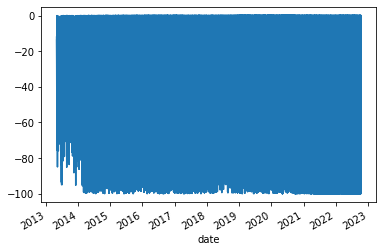

In [ ]:
test2['pct_change_7d'].plot()

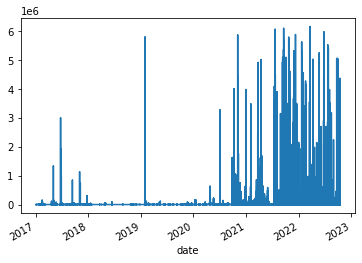

In [ ]:
initial_df[(initial_df['pct_change_7d']< initial_df['pct_change_7d'].nlargest(500).min()) & (initial_df.index > '2017-01-01')]['pct_change_7d'].plot()

In [ ]:
(df['pct_change_24h'] / 100).min()

-1.0

In [ ]:
df['log_change_24h'] = np.log(df['pct_change_24h'] + 1.0000000001)

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df

,name_symbol,price,volume_24h,circulating_supply,market_cap,pct_change_24h,pct_change_7d,log_change_24h
date,,,,,,,,
2013-04-29,BITCOIN BTC,1.445400e+02,0.0,1.109568e+07,1.603769e+09,7.635530,NaN,2.155885e+00
2013-04-29,LITECOIN LTC,4.383898e+00,0.0,1.719678e+07,7.538893e+07,0.920718,NaN,6.526991e-01
2013-04-29,NAMECOIN NMC,1.328323e+00,0.0,5.424100e+06,7.204955e+06,18.558000,NaN,2.973384e+00
2013-04-29,TERRACOIN TRC,7.096914e-01,0.0,2.334850e+06,1.657023e+06,9.584070,NaN,2.359350e+00
2013-04-29,DEVCOIN DVC,3.743586e-04,0.0,4.371770e+09,1.636610e+06,14.639800,NaN,2.749819e+00
...,...,...,...,...,...,...,...,...
2022-10-15,BABY-FPS-TOKEN BFPS,6.775802e-05,0.0,0.000000e+00,0.000000e+00,0.000000,-29.800288,1.000000e-10
2022-10-15,ALEX-LAB ALEX,2.023764e-02,0.0,0.000000e+00,0.000000e+00,-1.788206,0.000000,NaN
2022-10-15,RETAWARS-GOLDROSE-TOKEN GRT,1.494837e-02,0.0,0.000000e+00,0.000000e+00,0.000000,0.034392,1.000000e-10


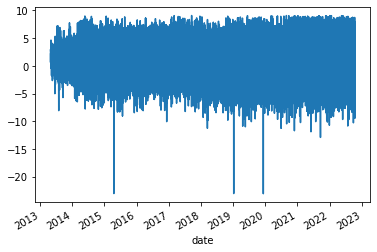

In [ ]:
df[df['market_cap']>0]['log_change_24h'].dropna().plot()

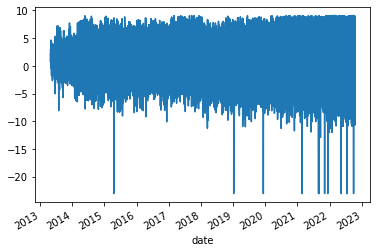

In [ ]:
df['log_change_24h'].dropna().plot()

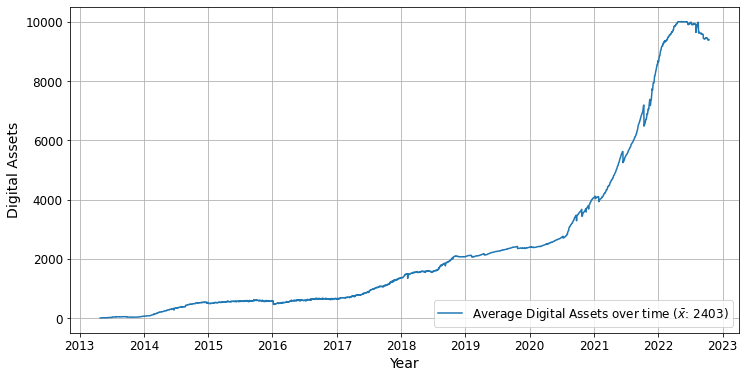

In [ ]:
count = (initial_df
         .groupby('date')['name_symbol']
         .count()
         .to_frame())
mean = count.mean().astype(int)['name_symbol']
plt.figure(figsize=(12,6))
plt.grid(True)
plt.plot(count, 
         label='Average Digital Assets over time ('+ r'$\bar{x}$' + f': {mean})')
plt.legend(loc='lower right')
plt.ylabel('Digital Assets', 
           fontsize=14)
plt.xlabel('Year', 
           fontsize=14)
#plt.yticks(c['id'].values[::2000])
plt.rc('axes', 
       labelsize=12)    # fontsize of the x and y labels
plt.rc('legend', 
       fontsize=12)    # legend fontsize
plt.rc('xtick', 
       labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', 
       labelsize=12)    # fontsize of the tick labels
plt.savefig('/drive/My Drive/Colab Notebooks/Initial_Dataset.png', dpi=300)

In [ ]:
df

,date,name_symbol,price,volume_24h,circulating_supply,market_cap,pct_change_24h,pct_change_7d
7,2013-04-29,BITCOIN BTC,1.445400e+02,0.0,1.109568e+07,1.603769e+09,7.635530,NaN
8,2013-04-29,LITECOIN LTC,4.383898e+00,0.0,1.719678e+07,7.538893e+07,0.920718,NaN
10,2013-04-29,NAMECOIN NMC,1.328323e+00,0.0,5.424100e+06,7.204955e+06,18.558000,NaN
11,2013-04-29,TERRACOIN TRC,7.096914e-01,0.0,2.334850e+06,1.657023e+06,9.584070,NaN
12,2013-04-29,DEVCOIN DVC,3.743586e-04,0.0,4.371770e+09,1.636610e+06,14.639800,NaN
...,...,...,...,...,...,...,...,...
8288541,2022-10-15,BABY-FPS-TOKEN BFPS,6.775802e-05,0.0,0.000000e+00,0.000000e+00,0.000000,-29.800288
8288542,2022-10-15,ALEX-LAB ALEX,2.023764e-02,0.0,0.000000e+00,0.000000e+00,-1.788206,0.000000
8288543,2022-10-15,RETAWARS-GOLDROSE-TOKEN GRT,1.494837e-02,0.0,0.000000e+00,0.000000e+00,0.000000,0.034392
8288544,2022-10-15,AMETA APLUS,4.831760e-03,0.0,0.000000e+00,0.000000e+00,-8.270602,0.000000


# Exclusion

In [ ]:
!pip install python-coinmarketcap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
API_KEY = '65c646b2-d7c8-4937-84dd-f2950f55e0ce'

In [ ]:
from coinmarketcapapi import CoinMarketCapAPI, CoinMarketCapAPIError

In [ ]:
cmc = CoinMarketCapAPI(API_KEY)

In [ ]:
# find the category ids 
id = cmc.cryptocurrency_categories()

ids = ['6053df7b6be1bf5c15e865ed', 
       '625d057257c0560770d004e2', 
       '625d04fa57c0560770d004e1',
       '604f2755ebccdd50cd175fc2',
       '604f2753ebccdd50cd175fc1']
# Wrapped Token'id': '6053df7b6be1bf5c15e865ed'
# EUR Stablecoins 'id': '625d057257c0560770d004e2'
# US Stablecoins 'id': '625d04fa57c0560770d004e1'
# Algorithmic Stablecoin 'id': '604f2755ebccdd50cd175fc2'
# Stablecoin 'id': '604f2753ebccdd50cd175fc1'

In [ ]:
exclusion_list = list()
latex_df = pd.DataFrame()
for id in ids:
  r = cmc.cryptocurrency_category(id=id)
  stablecoins = [i['name'].upper() + ' ' + i['symbol'] for i in r.data['coins']]
  exclusion_list.extend(stablecoins)
  print(f'There are {len(stablecoins)} items for id {id}')
  name = pd.DataFrame([i['name'] for i in r.data['coins']], columns=['name'])
  symbol = pd.DataFrame([i['symbol'] for i in r.data['coins']], columns=['symbol'])
  lat = pd.concat([name, symbol], axis=1)
  latex_df = pd.concat([latex_df, lat],axis=1)

There are 23 items for id 6053df7b6be1bf5c15e865ed
There are 7 items for id 625d057257c0560770d004e2
There are 28 items for id 625d04fa57c0560770d004e1
There are 19 items for id 604f2755ebccdd50cd175fc2
There are 100 items for id 604f2753ebccdd50cd175fc1


In [ ]:
latex_df.drop_duplicates()

,name,symbol,name,symbol,name,symbol,name,symbol,name,symbol
0,Wrapped Bitcoin,WBTC,STASIS EURO,EURS,Tether,USDT,Frax,FRAX,Tether,USDT
1,Wrapped BNB,WBNB,Celo Euro,CEUR,USD Coin,USDC,USDD,USDD,USD Coin,USDC
2,renBTC,RENBTC,Tether EURt,EURT,Binance USD,BUSD,Neutrino USD,USDN,Binance USD,BUSD
3,Wrapped NXM,WNXM,Parallel,PAR,Frax,FRAX,Fei USD,FEI,Dai,DAI
4,Torum,XTM,sEUR,SEUR,Pax Dollar,USDP,TerraClassicUSD,USTC,Frax,FRAX
...,...,...,...,...,...,...,...,...,...,...
95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mexican Peso Tether,MXNT
96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sperax USD,USDs
97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ZEDXION,USDZ
98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TOR,TOR


In [ ]:
wrapped = list()
for word in initial_df['name_symbol']:
  if 'WRAPPED' in word:
    wrapped.append(word)
  else:
    continue

In [ ]:
USD = list()
for word in initial_df['name_symbol']:
  if 'USD' in word:
    USD.append(word)
  else:
    continue

In [ ]:
EUR = list()
for word in initial_df['name_symbol']:
  if 'EUR' in word:
    EUR.append(word)
  else:
    continue

In [ ]:
df = df[~df['name_symbol'].isin(exclusion_list)]
df = df[~df['name_symbol'].isin(wrapped)]
df = df[~df['name_symbol'].isin(USD)]
df = df[~df['name_symbol'].isin(EUR)]

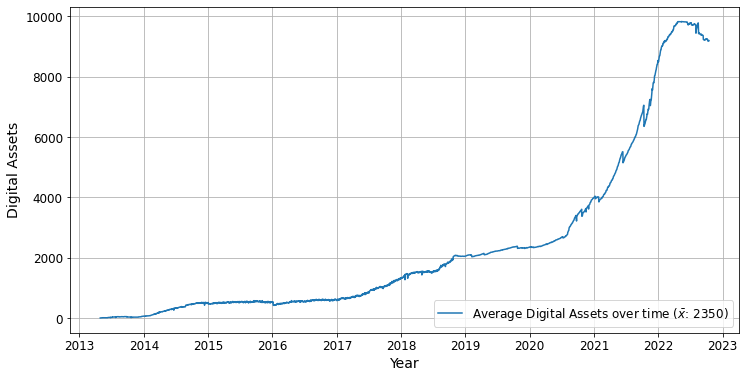

In [ ]:
count = (df
         .groupby('date')['name_symbol']
         .count()
         .to_frame())
mean = count.mean().astype(int)['name_symbol']
plt.figure(figsize=(12,6))
plt.grid(True)
plt.plot(count, 
         label='Average Digital Assets over time ('+ r'$\bar{x}$' + f': {mean})')
plt.legend(loc='lower right')
plt.ylabel('Digital Assets', 
           fontsize=14)
plt.xlabel('Year', 
           fontsize=14)
plt.rc('axes', 
       labelsize=12)    # fontsize of the x and y labels
plt.rc('legend', 
       fontsize=12)    # legend fontsize
plt.rc('xtick', 
       labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', 
       labelsize=12)    # fontsize of the tick labels
#plt.savefig('/drive/My Drive/Colab Notebooks/Initial_Dataset.png', dpi=300)

In [ ]:
def calclen(group):
  length = len(group)
  if length < 365:
    group['length'] = 0
  else:
    group['length'] = 1
  return group

In [ ]:
df = df.groupby('name_symbol').apply(calclen)

In [ ]:
df = df[df['length']==1]

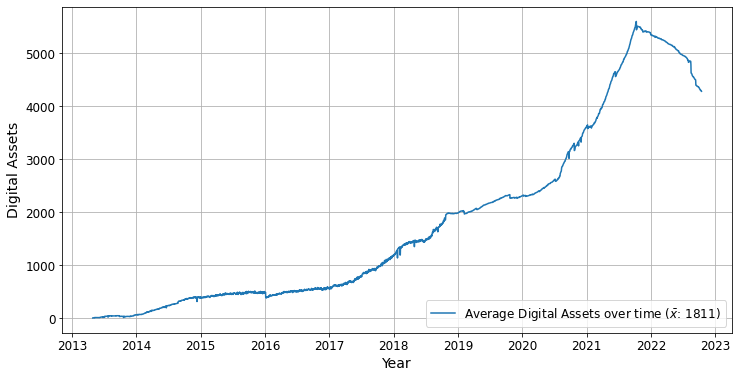

In [ ]:
count = (df
         .groupby('date')['name_symbol']
         .count()
         .to_frame())
mean = count.mean().astype(int)['name_symbol']
plt.figure(figsize=(12,6))
plt.grid(True)
plt.plot(count, 
         label='Average Digital Assets over time ('+ r'$\bar{x}$' + f': {mean})')
plt.legend(loc='lower right')
plt.ylabel('Digital Assets', 
           fontsize=14)
plt.xlabel('Year', 
           fontsize=14)
plt.rc('axes', 
       labelsize=12)    # fontsize of the x and y labels
plt.rc('legend', 
       fontsize=12)    # legend fontsize
plt.rc('xtick', 
       labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', 
       labelsize=12)    # fontsize of the tick labels
#plt.savefig('/drive/My Drive/Colab Notebooks/Initial_Dataset.png', dpi=300)

In [ ]:
df = df[df['circulating_supply']>0]

In [ ]:
def group_index_val(group):
  group['Index_value'] = group['price']*group['market_cap']
  group['group_mkt_cap'] = group['market_cap'].sum()/1000
  group['Index_level'] = group['Index_value'].sum()/group['group_mkt_cap'].mean()
  return group

In [ ]:
new_df = df.groupby('date').apply(group_index_val)

In [ ]:
new_df

,date,name_symbol,price,volume_24h,circulating_supply,market_cap,pct_change_24h,pct_change_7d,length,Index_value,group_mkt_cap,Index_level
7,2013-04-29,BITCOIN BTC,1.445400e+02,0.00,1.109568e+07,1.603769e+09,7.635530,NaN,1,2.318087e+11,1.690935e+06,1.372945e+05
8,2013-04-29,LITECOIN LTC,4.383898e+00,0.00,1.719678e+07,7.538893e+07,0.920718,NaN,1,3.304974e+08,1.690935e+06,1.372945e+05
10,2013-04-29,NAMECOIN NMC,1.328323e+00,0.00,5.424100e+06,7.204955e+06,18.558000,NaN,1,9.570505e+06,1.690935e+06,1.372945e+05
11,2013-04-29,TERRACOIN TRC,7.096914e-01,0.00,2.334850e+06,1.657023e+06,9.584070,NaN,1,1.175975e+06,1.690935e+06,1.372945e+05
12,2013-04-29,DEVCOIN DVC,3.743586e-04,0.00,4.371770e+09,1.636610e+06,14.639800,NaN,1,6.126789e+02,1.690935e+06,1.372945e+05
...,...,...,...,...,...,...,...,...,...,...,...,...
7938032,2022-10-15,NFT NFT,5.510480e-07,814108.41,3.686340e+07,2.031350e+01,-3.264183,0.018561,1,1.119372e-05,7.408463e+08,9.766388e+06
7938034,2022-10-15,YFFII-FINANCE YFFII,1.325665e-05,250.57,3.000000e+04,3.976996e-01,-5.730201,-36.228397,1,5.272166e-06,7.408463e+08,9.766388e+06
7938035,2022-10-15,INNOVATIVE-BIORESEARCH-CLASSIC INNBCL,1.000087e-10,0.00,3.570727e+09,3.571038e-01,0.001310,0.000409,1,3.571349e-11,7.408463e+08,9.766388e+06
7938036,2022-10-15,HALODAO RNBW,2.400209e-08,37.95,5.602877e+06,1.344807e-01,-16.827012,-89.220438,1,3.227819e-09,7.408463e+08,9.766388e+06


In [ ]:
new_df.set_index('date', inplace=True)

In [ ]:
new_df['Index_level'].drop_duplicates().pct_change().nsmallest()

date
2020-06-25   -0.999988
2015-09-18   -0.995415
2022-08-01   -0.420125
2020-03-12   -0.366908
2020-06-28   -0.343225
Name: Index_level, dtype: float64

In [ ]:

df

,date,name_symbol,price,volume_24h,circulating_supply,market_cap,pct_change_24h,pct_change_7d,length
7,2013-04-29,BITCOIN BTC,1.445400e+02,0.00,1.109568e+07,1.603769e+09,7.635530,NaN,1
8,2013-04-29,LITECOIN LTC,4.383898e+00,0.00,1.719678e+07,7.538893e+07,0.920718,NaN,1
10,2013-04-29,NAMECOIN NMC,1.328323e+00,0.00,5.424100e+06,7.204955e+06,18.558000,NaN,1
11,2013-04-29,TERRACOIN TRC,7.096914e-01,0.00,2.334850e+06,1.657023e+06,9.584070,NaN,1
12,2013-04-29,DEVCOIN DVC,3.743586e-04,0.00,4.371770e+09,1.636610e+06,14.639800,NaN,1
...,...,...,...,...,...,...,...,...,...
7938032,2022-10-15,NFT NFT,5.510480e-07,814108.41,3.686340e+07,2.031350e+01,-3.264183,0.018561,1
7938034,2022-10-15,YFFII-FINANCE YFFII,1.325665e-05,250.57,3.000000e+04,3.976996e-01,-5.730201,-36.228397,1
7938035,2022-10-15,INNOVATIVE-BIORESEARCH-CLASSIC INNBCL,1.000087e-10,0.00,3.570727e+09,3.571038e-01,0.001310,0.000409,1
7938036,2022-10-15,HALODAO RNBW,2.400209e-08,37.95,5.602877e+06,1.344807e-01,-16.827012,-89.220438,1


In [ ]:
df['log_change_24h'] = np.log(df['pct_change_24h']+1.000000001)

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
plo = df[df['pct_change_24h']>250]

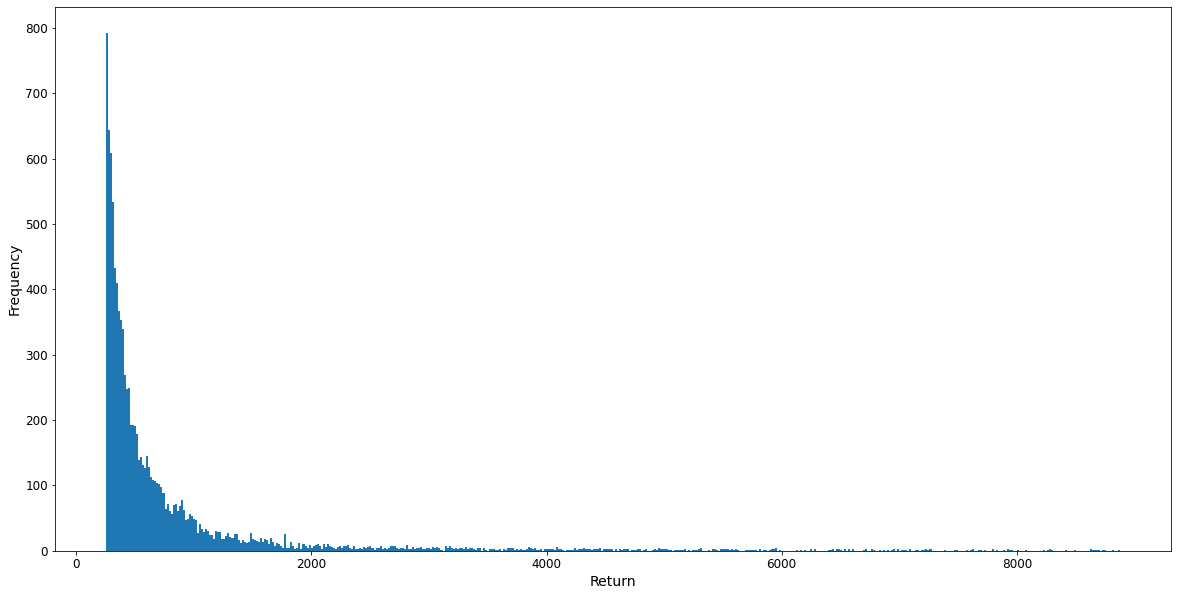

In [ ]:
plt.figure(figsize=(20,10))
plt.hist(plo['pct_change_24h'], bins=500)
plt.xlabel('Return',
           fontsize=14)
plt.ylabel('Frequency',
           fontsize=14)
plt.rc('axes', 
       labelsize=12)    # fontsize of the x and y labels
plt.rc('legend', 
       fontsize=12)    # legend fontsize
plt.rc('xtick', 
       labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', 
       labelsize=12)    # fontsize of the tick labels
plt.savefig('/drive/My Drive/Colab Notebooks/Return_Distribution.png', dpi=300)

In [ ]:
initial_df[initial_df['pct_change_24h'] >= 10000]

,date,name_symbol,price,volume_24h,circulating_supply,market_cap,pct_change_24h,pct_change_7d
12759,2014-02-17,ELECTRIC VOLT,4.405240e-01,5216.437500,2.968057e+09,1.307500e+09,179586.000000,531180.000000
23473,2014-04-19,RAINBOWCOIN LGBT,3.510957e-05,5.263355,9.960185e+08,3.496978e+04,24978.300000,31.463800
42206,2014-06-25,XXLCOIN XXL,5.692953e-06,0.853943,5.076207e+11,2.889861e+06,831115.000000,NaN
42654,2014-06-26,STLCOIN STL,4.027278e-03,0.004080,2.658950e+06,1.070833e+04,71098.900000,-20.244900
49132,2014-07-15,HEISENBERG HEX,6.215860e-06,0.041516,1.247355e+10,7.753387e+04,10913.900000,2105.730000
...,...,...,...,...,...,...,...,...
8269992,2022-10-11,THE-BANK-COIN BANK,1.181365e-04,0.000000,0.000000e+00,0.000000e+00,76880.805075,-68.817516
8276391,2022-10-13,PUMPETH PETH,2.021992e-08,1078.070000,0.000000e+00,0.000000e+00,10293.450243,-99.999987
8281964,2022-10-14,JETSET JTS,2.984997e-04,46.740000,0.000000e+00,0.000000e+00,21295.652547,23101.708132
8282900,2022-10-14,SLEEP-GAME SLEEP,7.530402e-01,0.010000,0.000000e+00,0.000000e+00,22650.068569,0.000000


In [ ]:
initial_df['pct_change_24h'].nlargest(100)

6340014    1.056984e+20
6340012    1.026897e+20
6657061    2.688755e+18
6700179    2.632331e+18
6541410    1.670087e+14
               ...     
4506203    9.707350e+06
3844289    9.534583e+06
5165756    9.417600e+06
8099904    9.235535e+06
6705952    9.105422e+06
Name: pct_change_24h, Length: 100, dtype: float64

In [ ]:
df.set_index('date', inplace=True)
df.index = pd.to_datetime(df.index)

In [ ]:
prices = df[['name_symbol', 'price']]

In [ ]:
prices = pd.pivot_table(data=prices, index=prices.index, values='price', columns='name_symbol')

In [ ]:
monthly_price = prices.resample('M').last()

In [ ]:
monthly_return = monthly_price.pct_change()

In [ ]:
monthly_return.hist(, bins=500)

KeyboardInterrupt: ignored

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fca6bc9e830> (for post_execute):


KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7fca6bca5320> (for post_execute):


KeyboardInterrupt: ignored

In [ ]:
m_returns = monthly_return.stack().to_frame()

In [ ]:
m_returns.reset_index(inplace=True)

In [ ]:
m_returns.set_index('date', inplace=True)

In [ ]:
m_returns.rename(columns={0:'pct_change'}, inplace=True)

(array([1.96881e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00

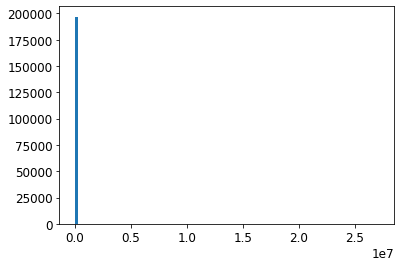

In [ ]:
plt.hist(m_returns['pct_change'], bins=100)

In [ ]:
m_returns['pct_change'].replace(to_replace=np.inf, value=np.nan, inplace=True)

In [ ]:
m_returns['pct_change'].nlargest(10)

date
2020-05-31    2.714673e+07
2020-06-30    1.753421e+05
2021-06-30    1.646709e+05
2022-08-31    1.306061e+05
2017-06-30    8.591057e+04
2021-10-31    5.091343e+04
2020-09-30    1.624324e+04
2022-01-31    8.727568e+03
2018-07-31    6.935920e+03
2015-09-30    6.098785e+03
Name: pct_change, dtype: float64

In [ ]:
plo = m_returns[m_returns['pct_change']>1000]

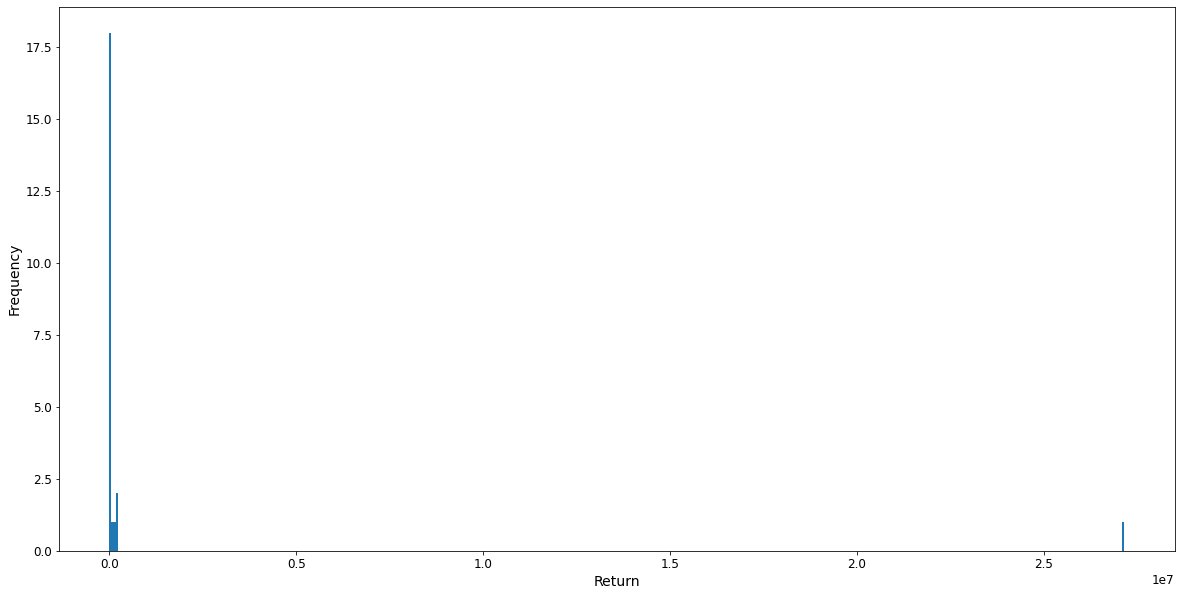

In [ ]:
plt.figure(figsize=(20,10))
plt.hist(plo['pct_change'], bins=500)
plt.xlabel('Return',
           fontsize=14)
plt.ylabel('Frequency',
           fontsize=14)
plt.rc('axes', 
       labelsize=12)    # fontsize of the x and y labels
plt.rc('legend', 
       fontsize=12)    # legend fontsize
plt.rc('xtick', 
       labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', 
       labelsize=12)    # fontsize of the tick labels
plt.savefig('/drive/My Drive/Colab Notebooks/Return_Distribution.png', dpi=300)

In [ ]:
import random
import numpy as np
import pandas as pd

In [ ]:
w, l = map(int, input().split())
mat1 = []
for i in range(l):
    row = list(map(int, input().split()))
    mat1.append(row)

1 3 4 2 5 7 5 3 3 9 7


ValueError: ignored

In [ ]:
mat1 = np.random.random((5, 5))

In [ ]:
mat1

array([[0.52756772, 0.16343198, 0.19146127, 0.28198523, 0.42622946],
       [0.08084631, 0.98688233, 0.56142327, 0.58792697, 0.85987092],
       [0.92439909, 0.88036934, 0.60190084, 0.29188035, 0.81095683],
       [0.01249053, 0.78458157, 0.17577953, 0.91652184, 0.87310529],
       [0.66654569, 0.90766128, 0.51399879, 0.94600083, 0.80687352]])

In [ ]:
pd.DataFrame(mat1).sort_values(axis=1)

TypeError: ignored

In [ ]:
mat1

array([[0.02433508, 0.02060255, 0.37992049, 0.00771543, 0.2228928 ],
       [0.03793256, 0.06793879, 0.38426555, 0.28329778, 0.39597816],
       [0.49658331, 0.21627918, 0.52623875, 0.304968  , 0.66203311],
       [0.50470402, 0.79195195, 0.75019621, 0.62981816, 0.68373848],
       [0.70345276, 0.8789827 , 0.87977201, 0.67158468, 0.698667  ]])

In [ ]:
5+((5*50)/100)

7.5

In [ ]:
prime_num = int(input('blablabla :'))
error_msg = 'bla'
print(str(prime_num) + error_msg)

blablabla :100
100bla


In [ ]:

list1=[1,2,3,4,5,6]
list2=[1,2,0,2,9,5]
helplist = [(list1[i] -list2[i]) if list1[i] > list2[i] else (list2[i] -list2[i]) for i in range(len(list1))]
print(helplist)

[0, 0, 3, 2, 0, 1]


In [ ]:
list1[1]

2

In [ ]:
Numbers = [100,100]

def Counter(Numbers):
    for i in range(len(Numbers)):
        value = max(Numbers[i])
        Numbers[i].remove(value)
    print(Numbers)
Counter(Numbers)

TypeError: ignored

In [ ]:
np.arange(0,1.1,0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [ ]:
for i in np.arange(0, 1.1, 0.1):
  print(type(i))

<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>


In [ ]:
omega = np.arange(1*10**(-10), 1000, 0.05)


In [ ]:
omega

array([1.00000000e-10, 5.00000001e-02, 1.00000000e-01, ...,
       9.99850000e+02, 9.99900000e+02, 9.99950000e+02])

In [ ]:
1*10**(-10)

1e-10

In [ ]:
import cmath

In [ ]:
def Z0(omega, L, C):
    z1 = Z1(omega, L)
    z2 = Z2(omega, C)
    return np.vectorize(z1 / (2 + cmath.sqrt(z1**2 / 4 + z1 * z2)))

# my first case Z1 as XL
#my second case Z1 as XC

def Z1(omega, L):
    return 1j*omega*L

# my first case Z2 as XC
#my second case Z2 as XL

def Z2(omega, C):
    return 1/(1j*omega*C)

#This is the propagation constant


def alpha(omega, L, C):
    z0 = Z0(omega, L, C)
    z1 = Z1(omega, L)
    return abs((z0 - z1)) / abs(z0)

# L as inductance = 5.5nH, C as capacitance = 33pF.
# They are initial value.

L = 5.5*10**(-9)
C = 33*10**(-12)


#omega as my x-axis

omega = np.arange(1*10**(-10), 1000, 0.05)

In [ ]:
import matplotlib.pyplot as plt

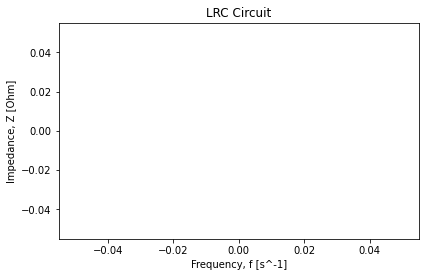

In [ ]:
for i in range(0,20):
    y_1 = alpha(omega, L, C)
    print(y_1)

fig, ax1 = plt.subplots(figsize = (5,3))
ax1 = fig.add_axes([0,0,1,1])
ax1.set_title("LRC Circuit")
#ax1.legend(loc = 'upper center')
ax1.set_xlabel('Frequency, f [s^-1]')
ax1.set_ylabel('Impedance, Z [Ohm]')
plt.plot()
plt.show()

In [ ]:
for i in range(0,20):
    y_1 = alpha(omega, L, C)
    print(y_1)

TypeError: ignored

In [ ]:
myList=[19, 87, 1, -1, 11, 0, -1, 33, 19]
myList.sort(reverse=True)
print(myList)

In [ ]:
aprime_numbers = [11, 3, 7, 5, 2]

In [ ]:
a = aprime_numbers.sort()

In [ ]:
print(myList)

[87, 33, 19, 19, 11, 1, 0, -1, -1]


In [ ]:
myList=[19, 87, 1, -1, 11, 0, -1, 33, 19]    
sorted_list = list()
for i in myList: 
  if i > max(myList)
    sorted_list.append(i)

In [ ]:
max(myList)

TypeError: ignored

In [ ]:
for i in range(5):
  print(i)

0
1
2
3
4


In [ ]:
print(i for i in range(5))

<generator object <genexpr> at 0x7ff3fa668a50>


In [ ]:
# for i in range(5):
#   print("count", i , "=", i)

count 0 = 0
count 1 = 1
count 2 = 2
count 3 = 3
count 4 = 4
